In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [39]:
df = pd.read_csv('./data/bank_uci.csv', sep = ';')

In [43]:
df.rename({'y': 'deposit'}, axis='columns', inplace = True)

In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [48]:
pd.DataFrame(df.isna().sum(), columns = ['Missing'])

,Missing
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


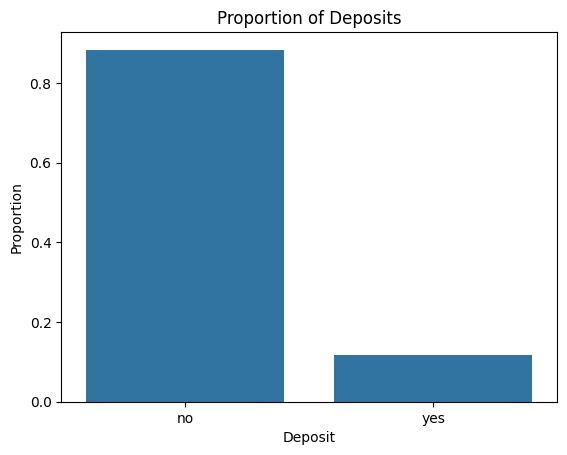

In [55]:
value_counts = df['deposit'].value_counts(normalize=True)

# Create a bar plot using seaborn
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Deposit')
plt.ylabel('Proportion')
plt.title('Proportion of Deposits')
plt.show()

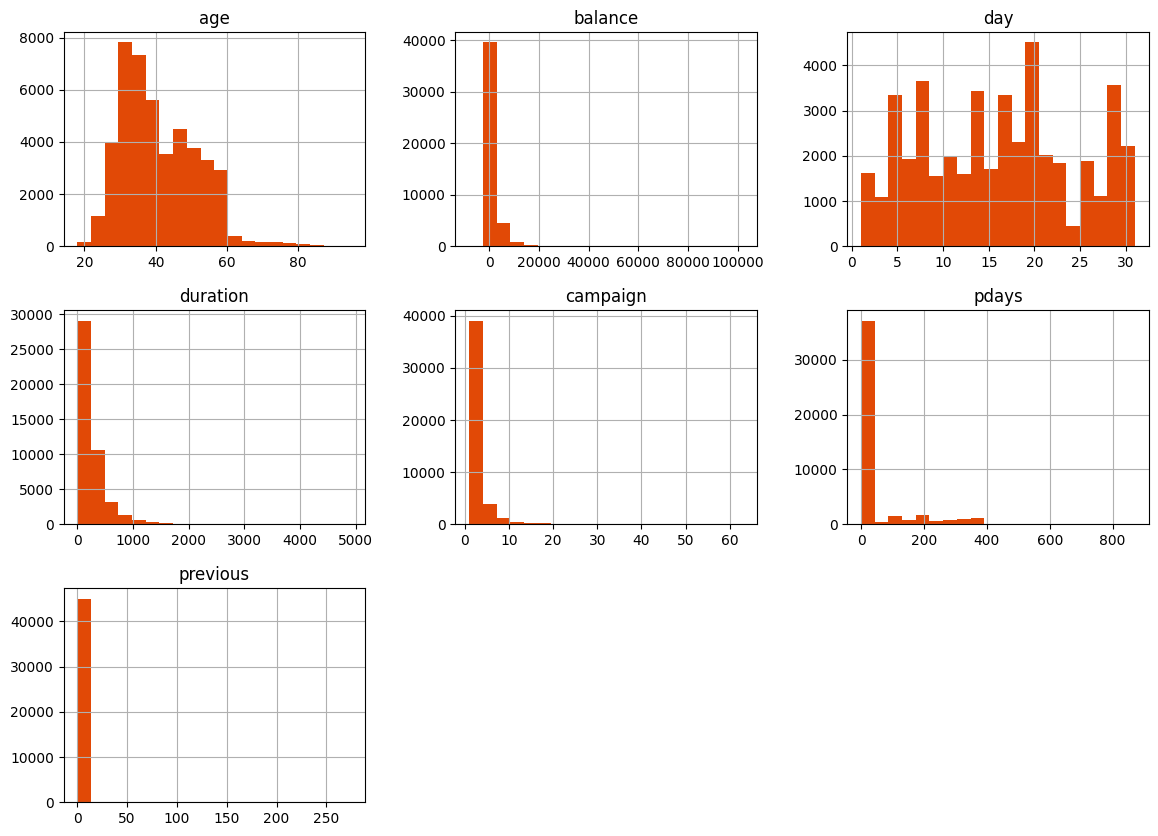

In [53]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

/tmp/ipykernel_14315/1581835270.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



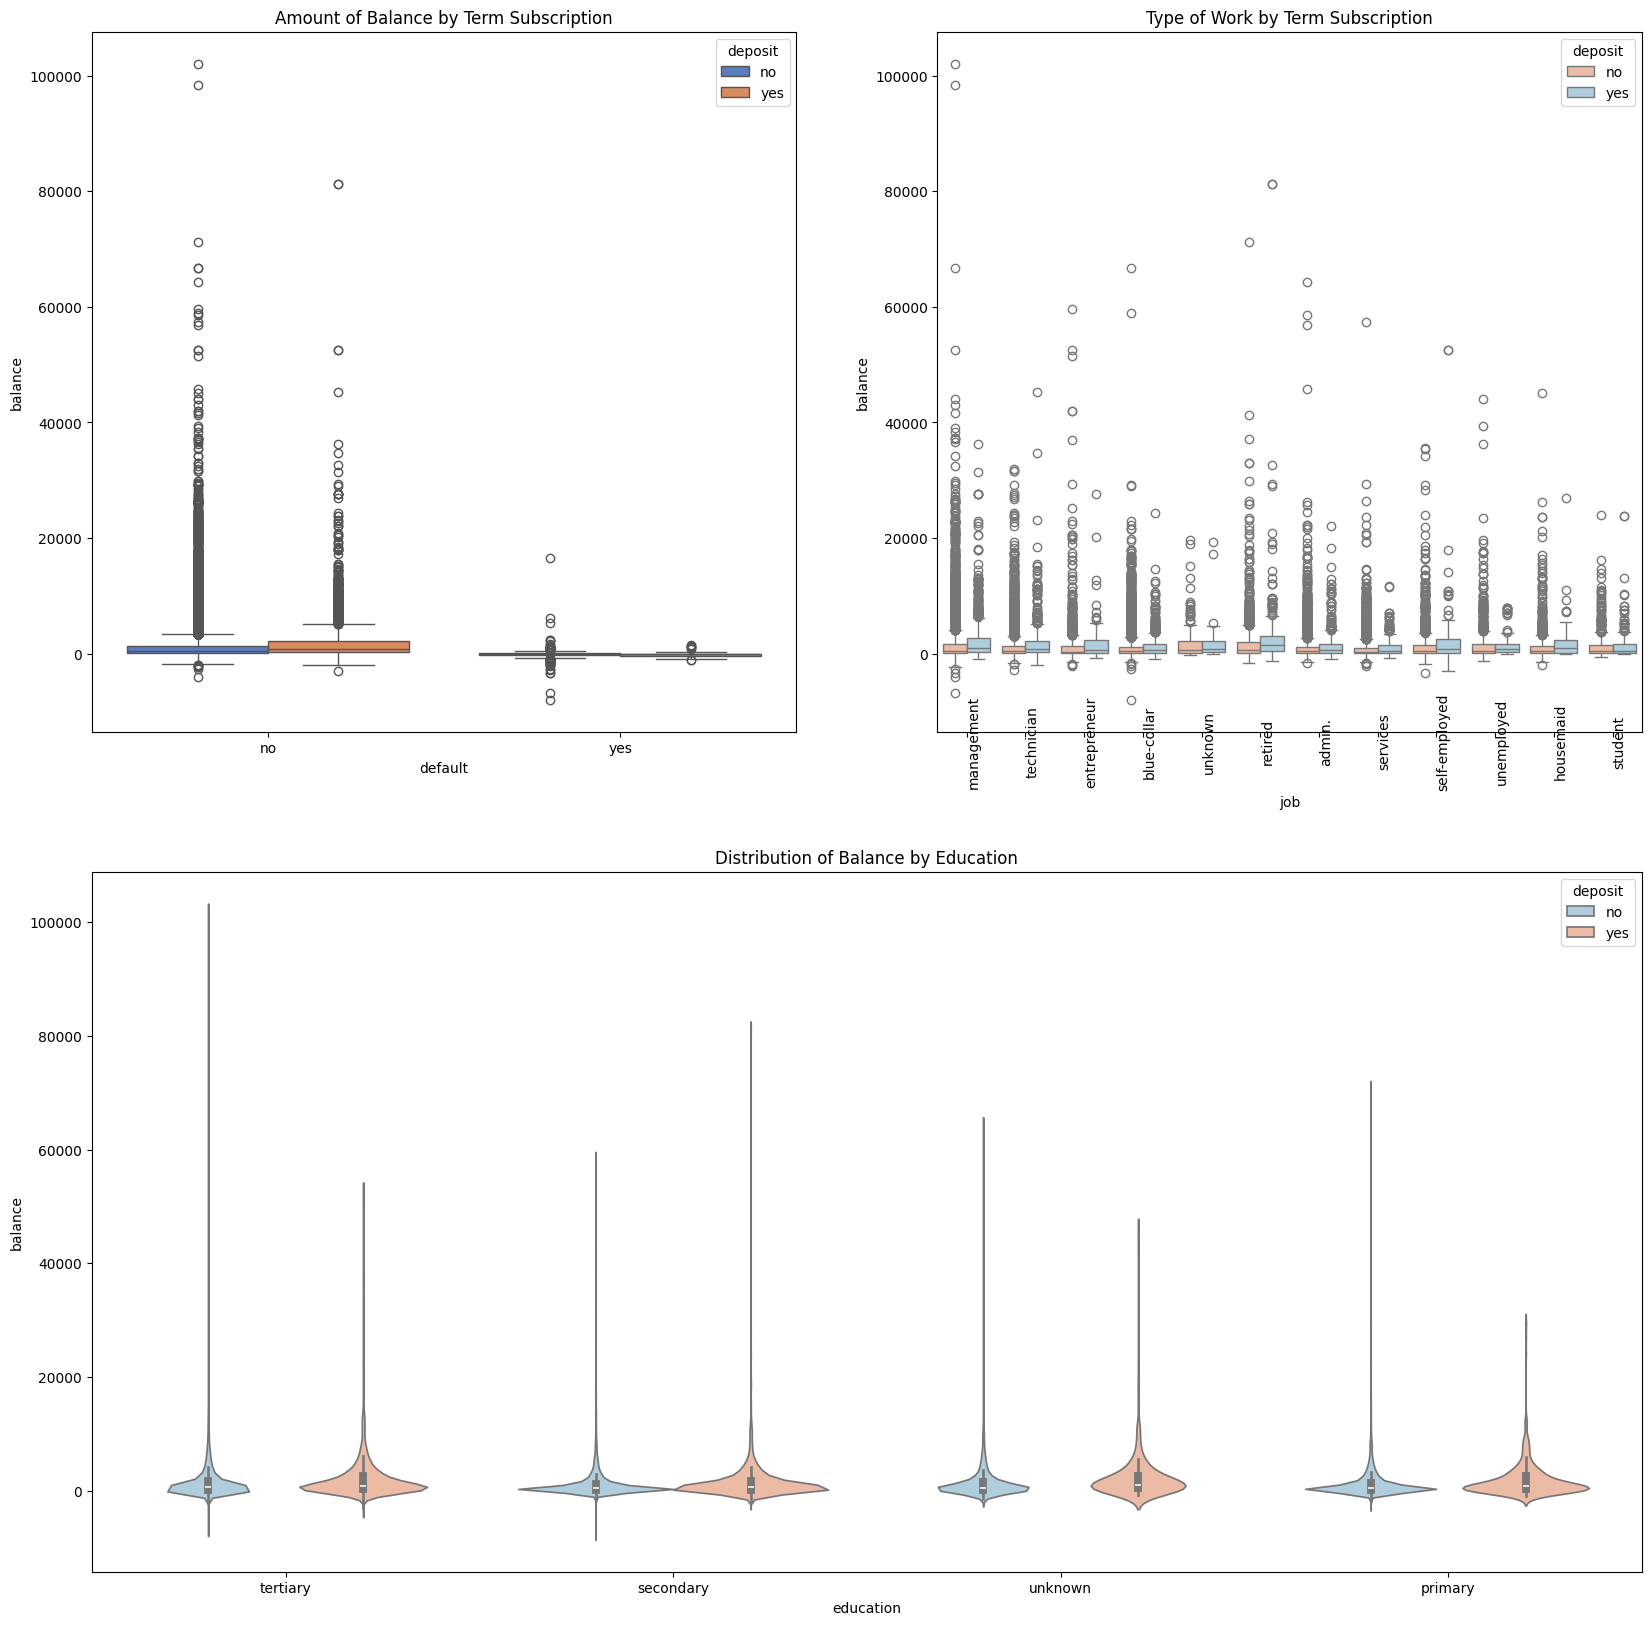

In [64]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Subscription")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Subscription")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [59]:
def categorical_descriptive_stats(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    stats_list = []

    for col in categorical_columns:

        count = df[col].count()

        frequency = df[col].value_counts()

        mode = frequency.idxmax()
        mode_freq = frequency.max()
        mode_pct = (mode_freq / count) * 100

        cardinality = df[col].nunique()

        second_mode = 'N/A'
        second_mode_freq = 'N/A'
        second_mode_pct = 'N/A'
        if len(frequency) > 1 and frequency.iloc[0] != frequency.iloc[1]:
            second_mode = frequency.index[1]
            second_mode_freq = frequency.iloc[1]
            second_mode_pct = (second_mode_freq / count) * 100

        stats_dict = {
            'Feature': col,
            'Count': count,
            '% Miss.': (1 - (count / df.shape[0])) * 100,
            'Card.': cardinality,
            'Mode': mode,
            'Mode Freq.': mode_freq,
            'Mode %': mode_pct,
            '2nd Mode': second_mode,
            '2nd Mode Freq.': second_mode_freq,
            '2nd Mode %': second_mode_pct
        }
        stats_list.append(stats_dict)

    stats_df = pd.DataFrame(stats_list)
    return stats_df

In [60]:
categorical_descriptive_stats(df)

,Feature,Count,% Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,job,45211,0.0,12,blue-collar,9732,21.525735,management,9458,20.919688
1,marital,45211,0.0,3,married,27214,60.193316,single,12790,28.289576
2,education,45211,0.0,4,secondary,23202,51.319369,tertiary,13301,29.419831
3,default,45211,0.0,2,no,44396,98.197341,yes,815,1.802659
4,housing,45211,0.0,2,yes,25130,55.583818,no,20081,44.416182
5,loan,45211,0.0,2,no,37967,83.977351,yes,7244,16.022649
6,contact,45211,0.0,3,cellular,29285,64.774059,unknown,13020,28.798301
7,month,45211,0.0,12,may,13766,30.448342,jul,6895,15.250713
8,poutcome,45211,0.0,4,unknown,36959,81.747805,failure,4901,10.840282
9,deposit,45211,0.0,2,no,39922,88.301520,yes,5289,11.698480


In [65]:
def plot_numerical_distributions(df, filename=None):

    numerical_columns = df.select_dtypes(include=['number']).columns

    num_rows = np.ceil(len(numerical_columns) / 2).astype(int)

    plt.figure(figsize=(20, 5 * num_rows))

    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, 2, i)
        sns.histplot(df[col], kde=False, color='blue', bins=30)

        median_val = df[col].median()
        mean_val = df[col].mean()
        skewness_val = skew(df[col].dropna())

        plt.axvline(median_val, color='red', linestyle='--', label='Median')
        plt.axvline(mean_val, color='green', linestyle='-', label='Mean')

        plt.title(f'Histogram of {col}')
        plt.xlabel(f'Median: {median_val}, Mean: {mean_val}, Skewness: {skewness_val:.2f}')
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout()

    if filename:
        plt.savefig(filename)
        plt.close()
        return filename
    else:
        plt.show()

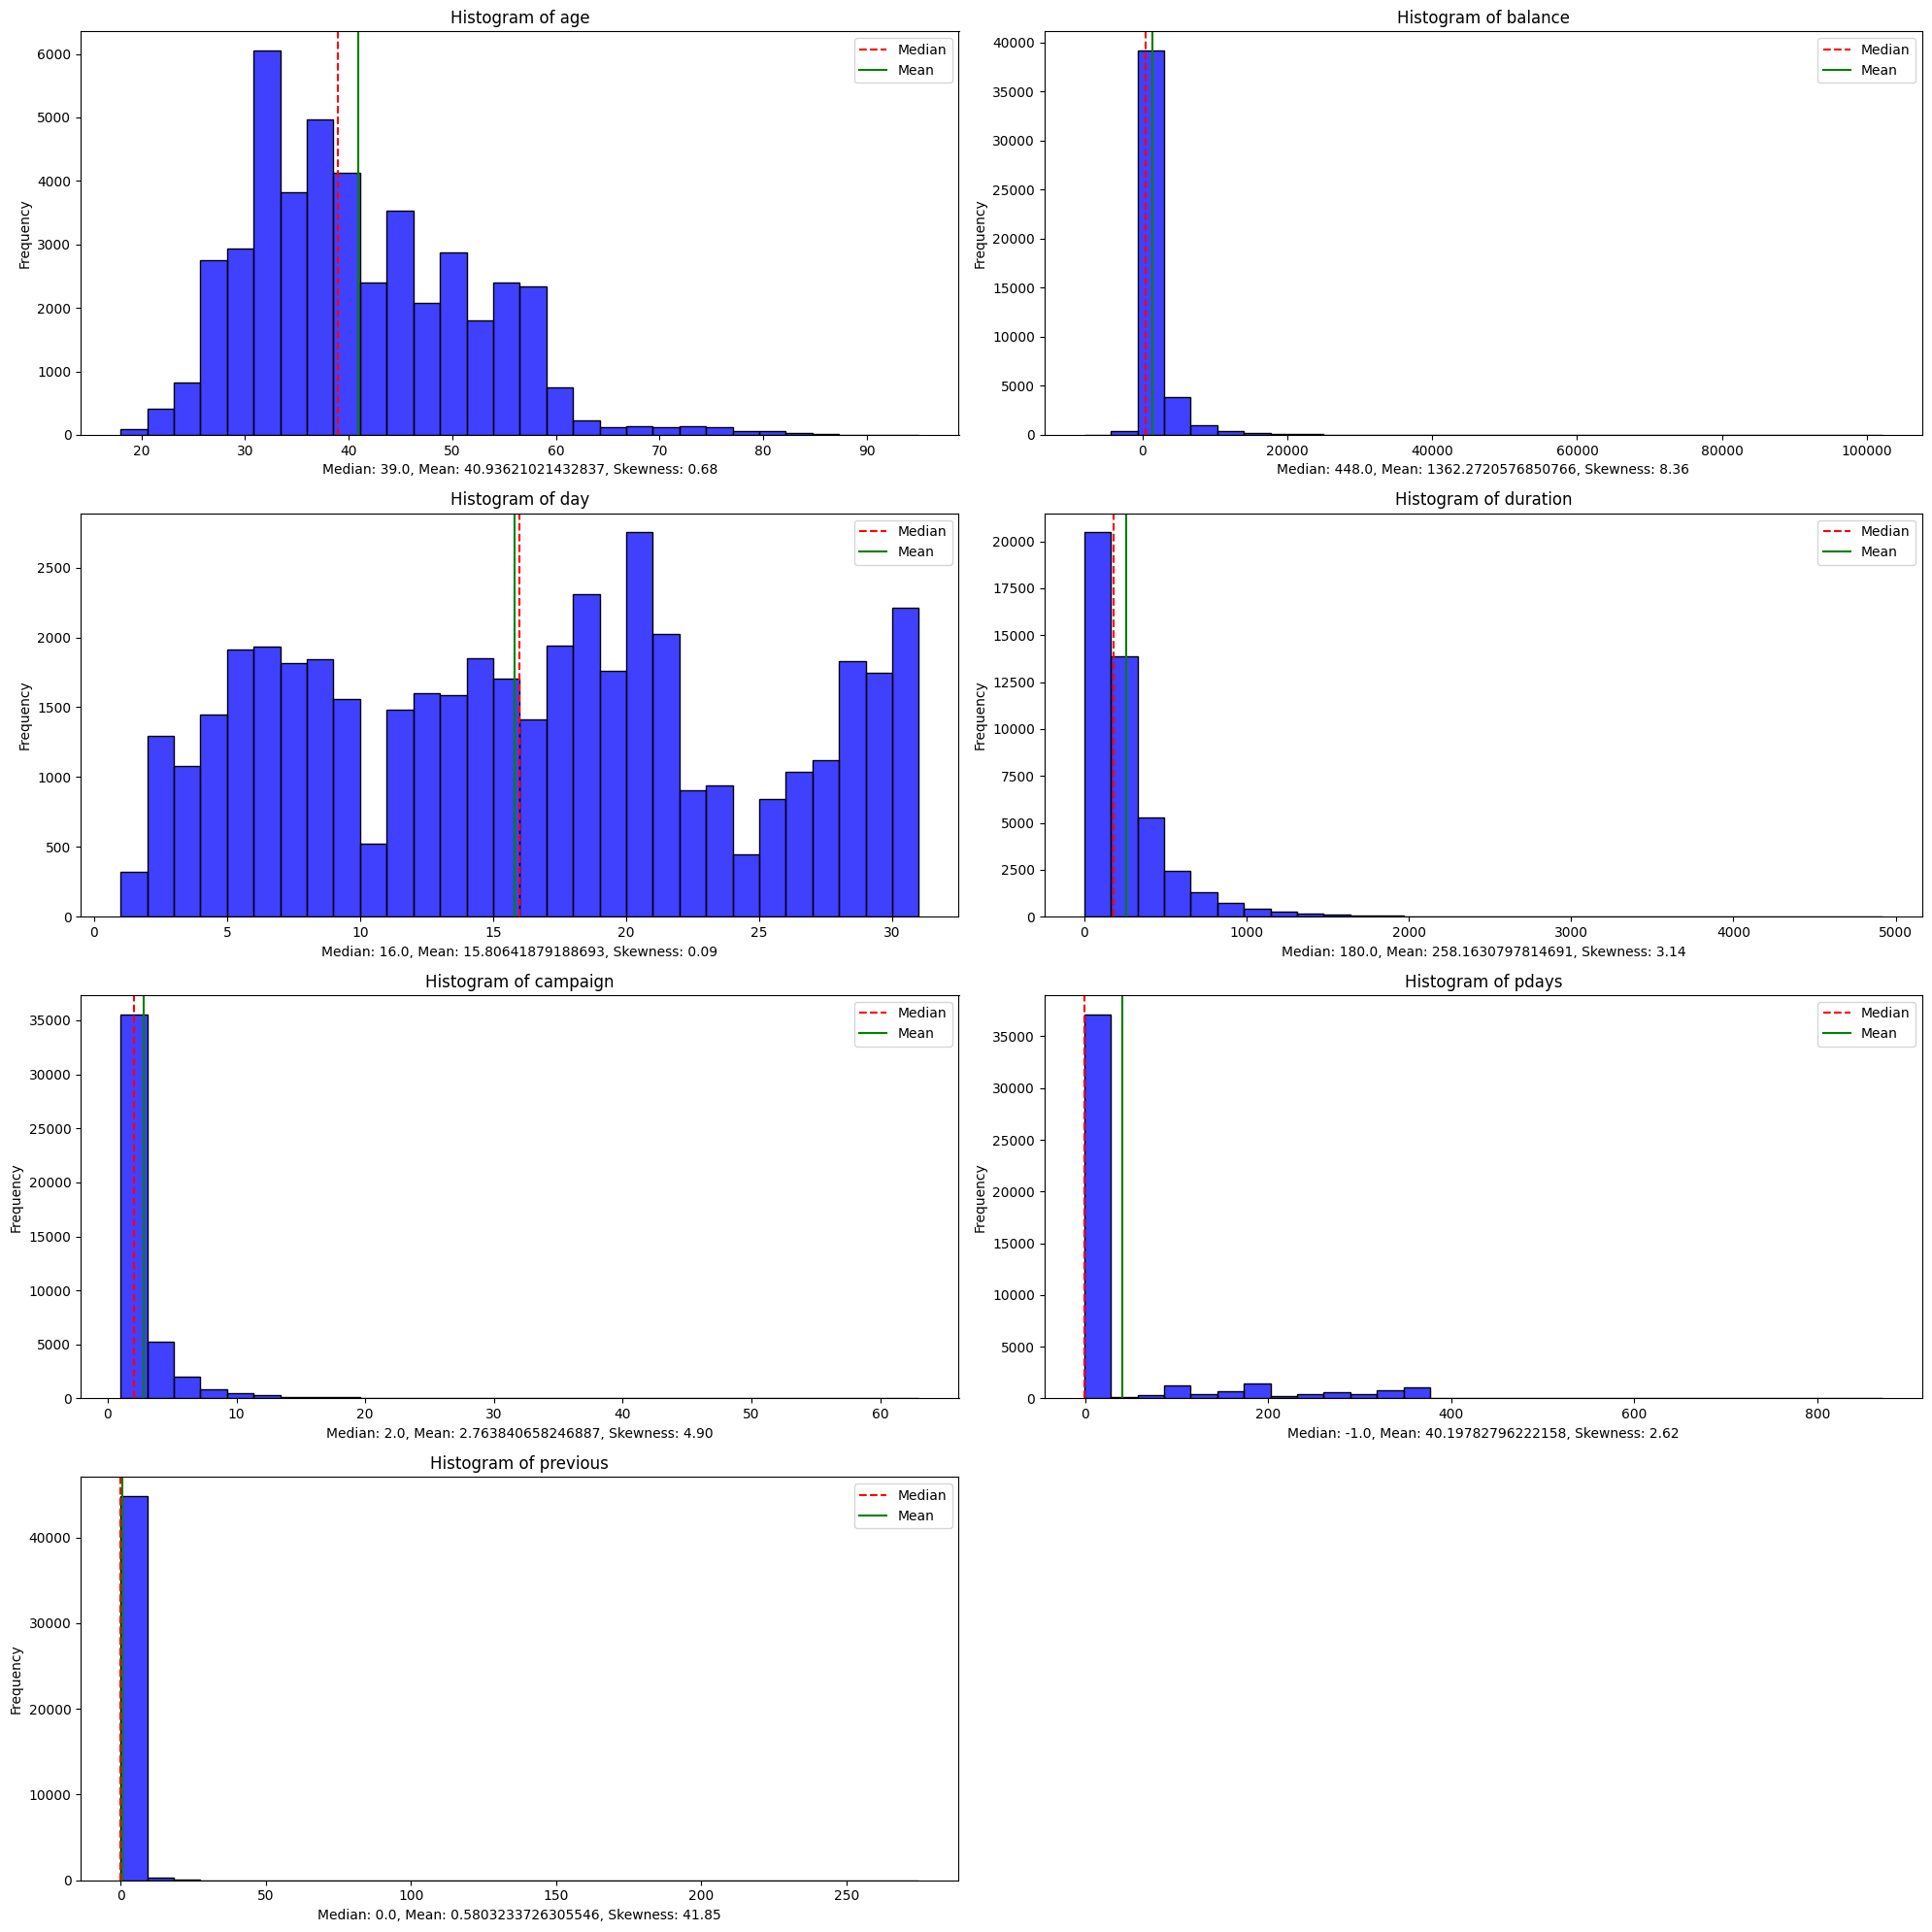

In [66]:
plot_numerical_distributions(df)

In [67]:
def plot_categorical_distributions(df, filename=None):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    num_rows = np.ceil(len(categorical_columns) / 2).astype(int)

    plt.figure(figsize=(20, 5 * num_rows))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(num_rows, 2, i)
        sns.countplot(x=df[col], color='skyblue')

        mode_val = df[col].mode()[0]

        plt.title(f'Histogram of {col}')
        plt.xlabel(f'Mode: {mode_val}')
        plt.ylabel('Frequency')

    plt.tight_layout()

    if filename:
        plt.savefig(filename)
        plt.close()
        return filename
    else:
        plt.show()

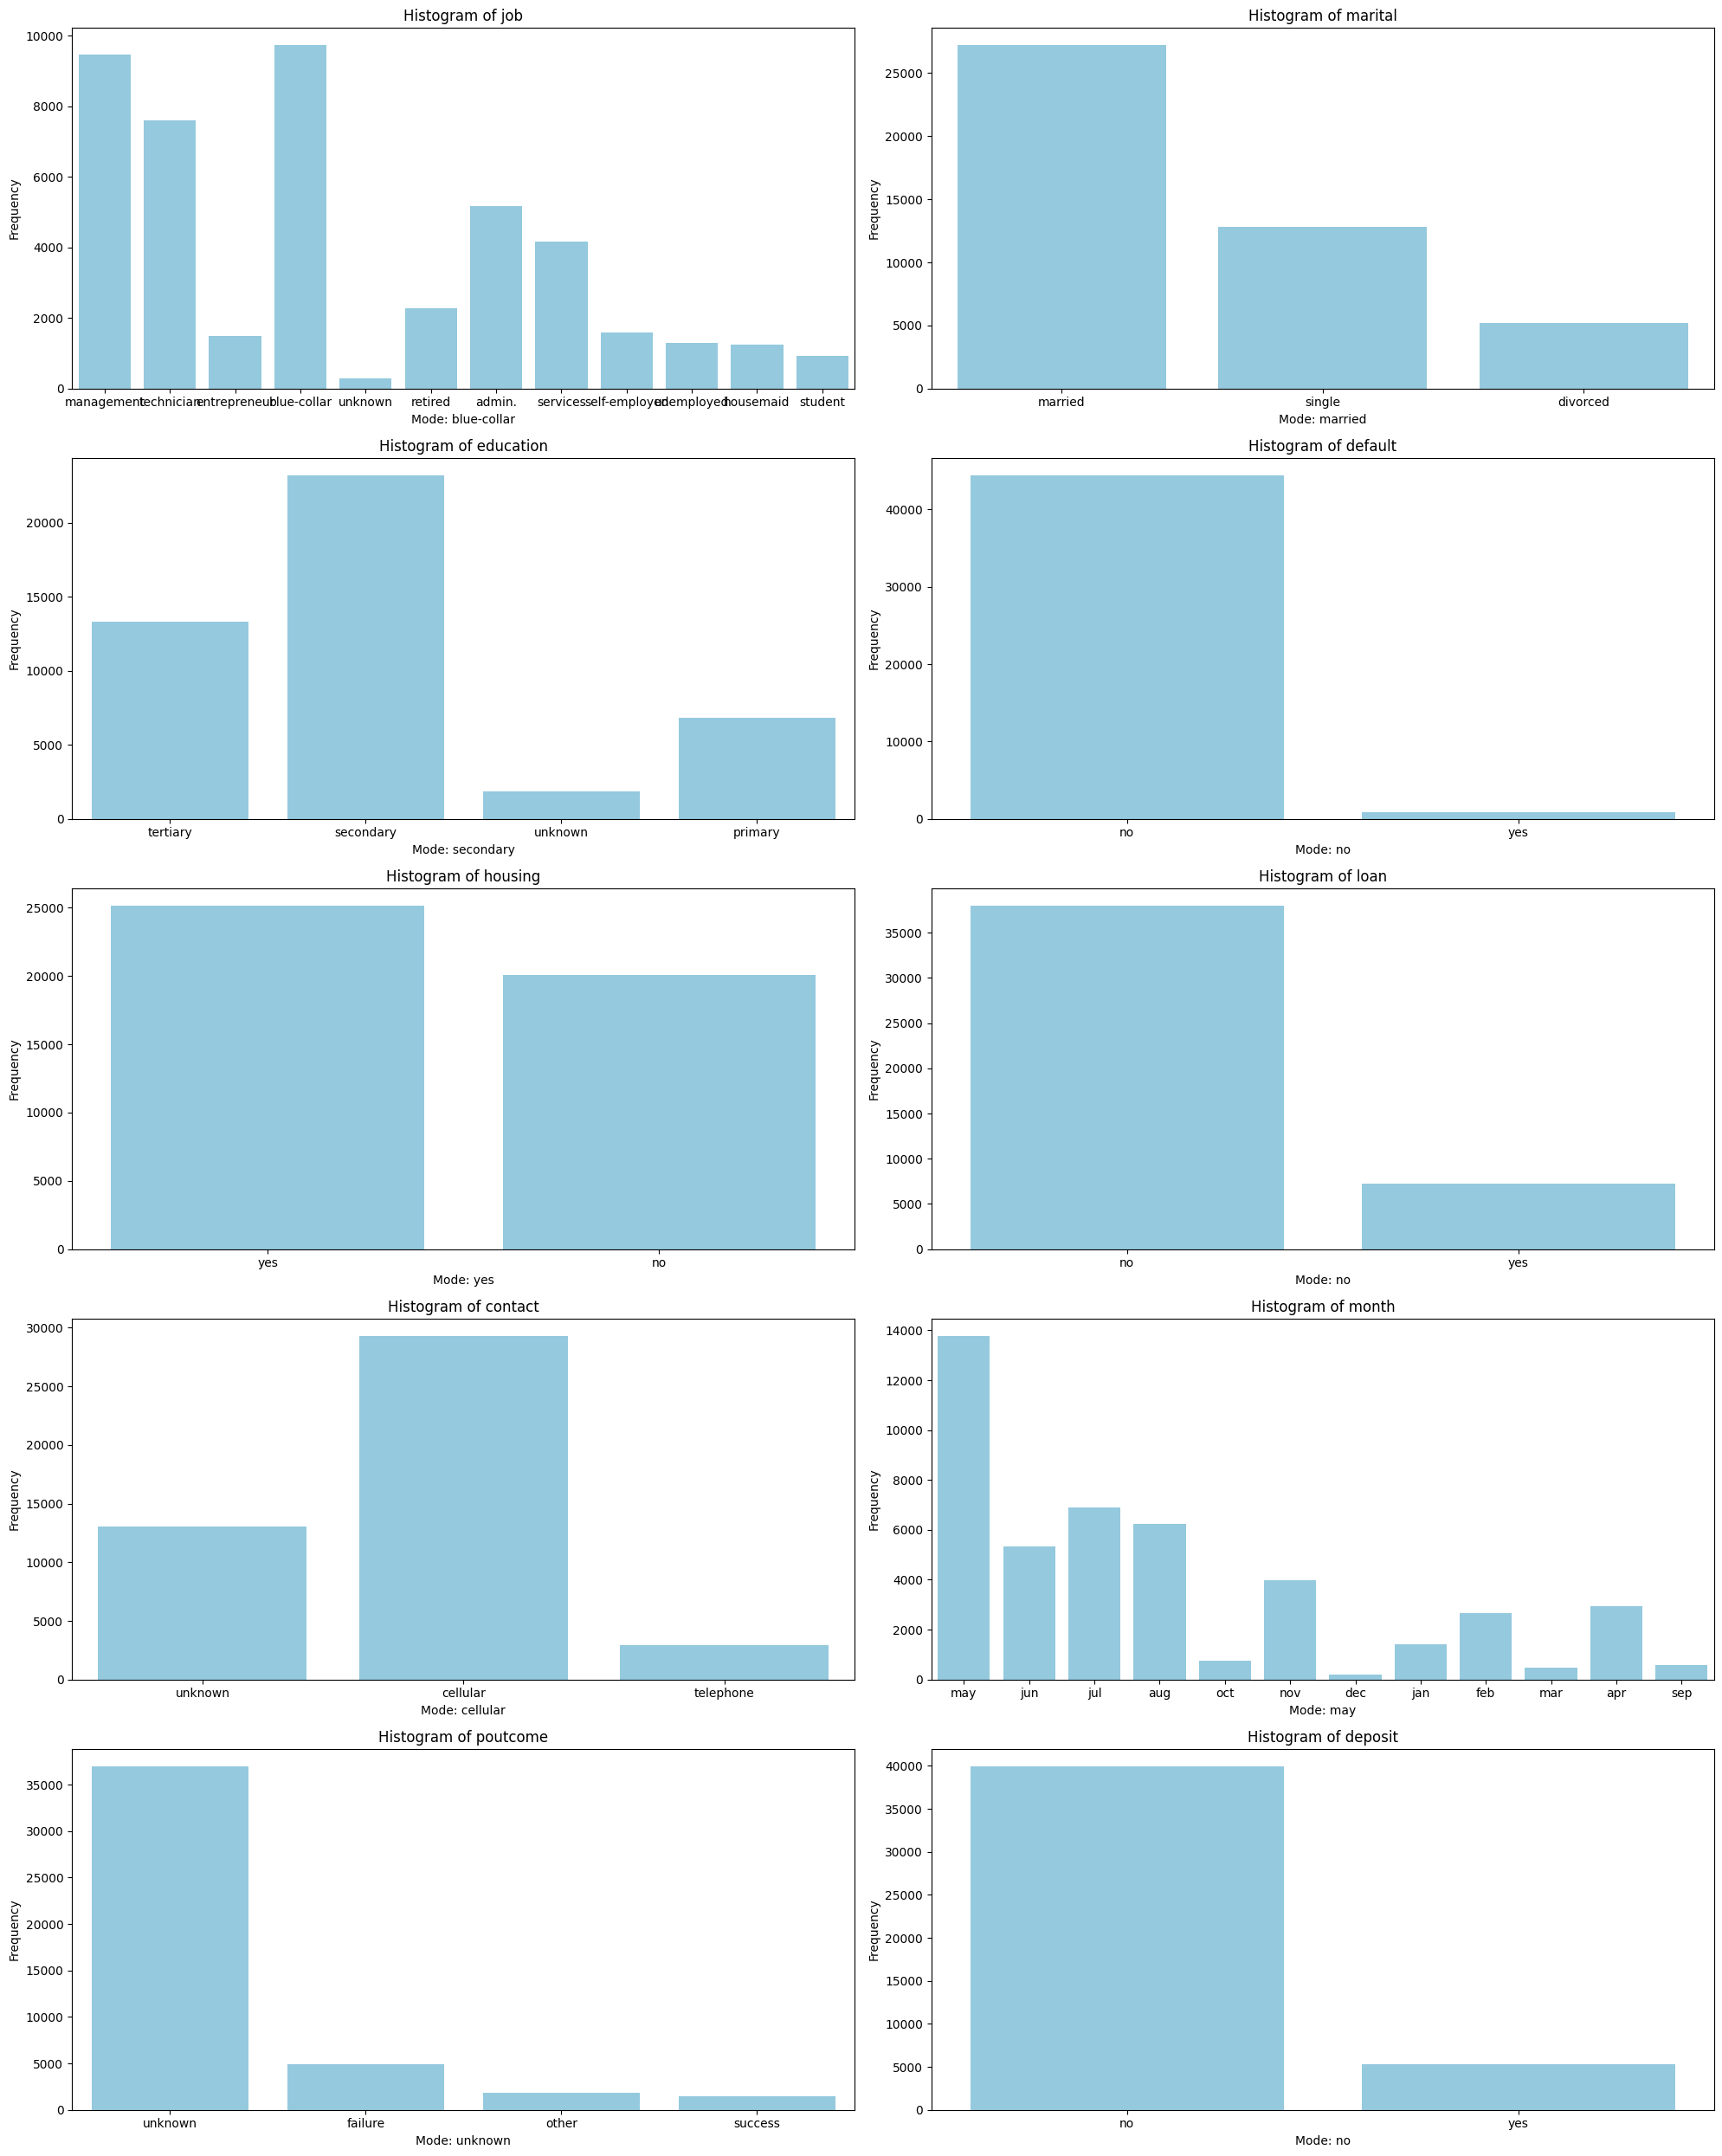

In [68]:
plot_categorical_distributions(df)

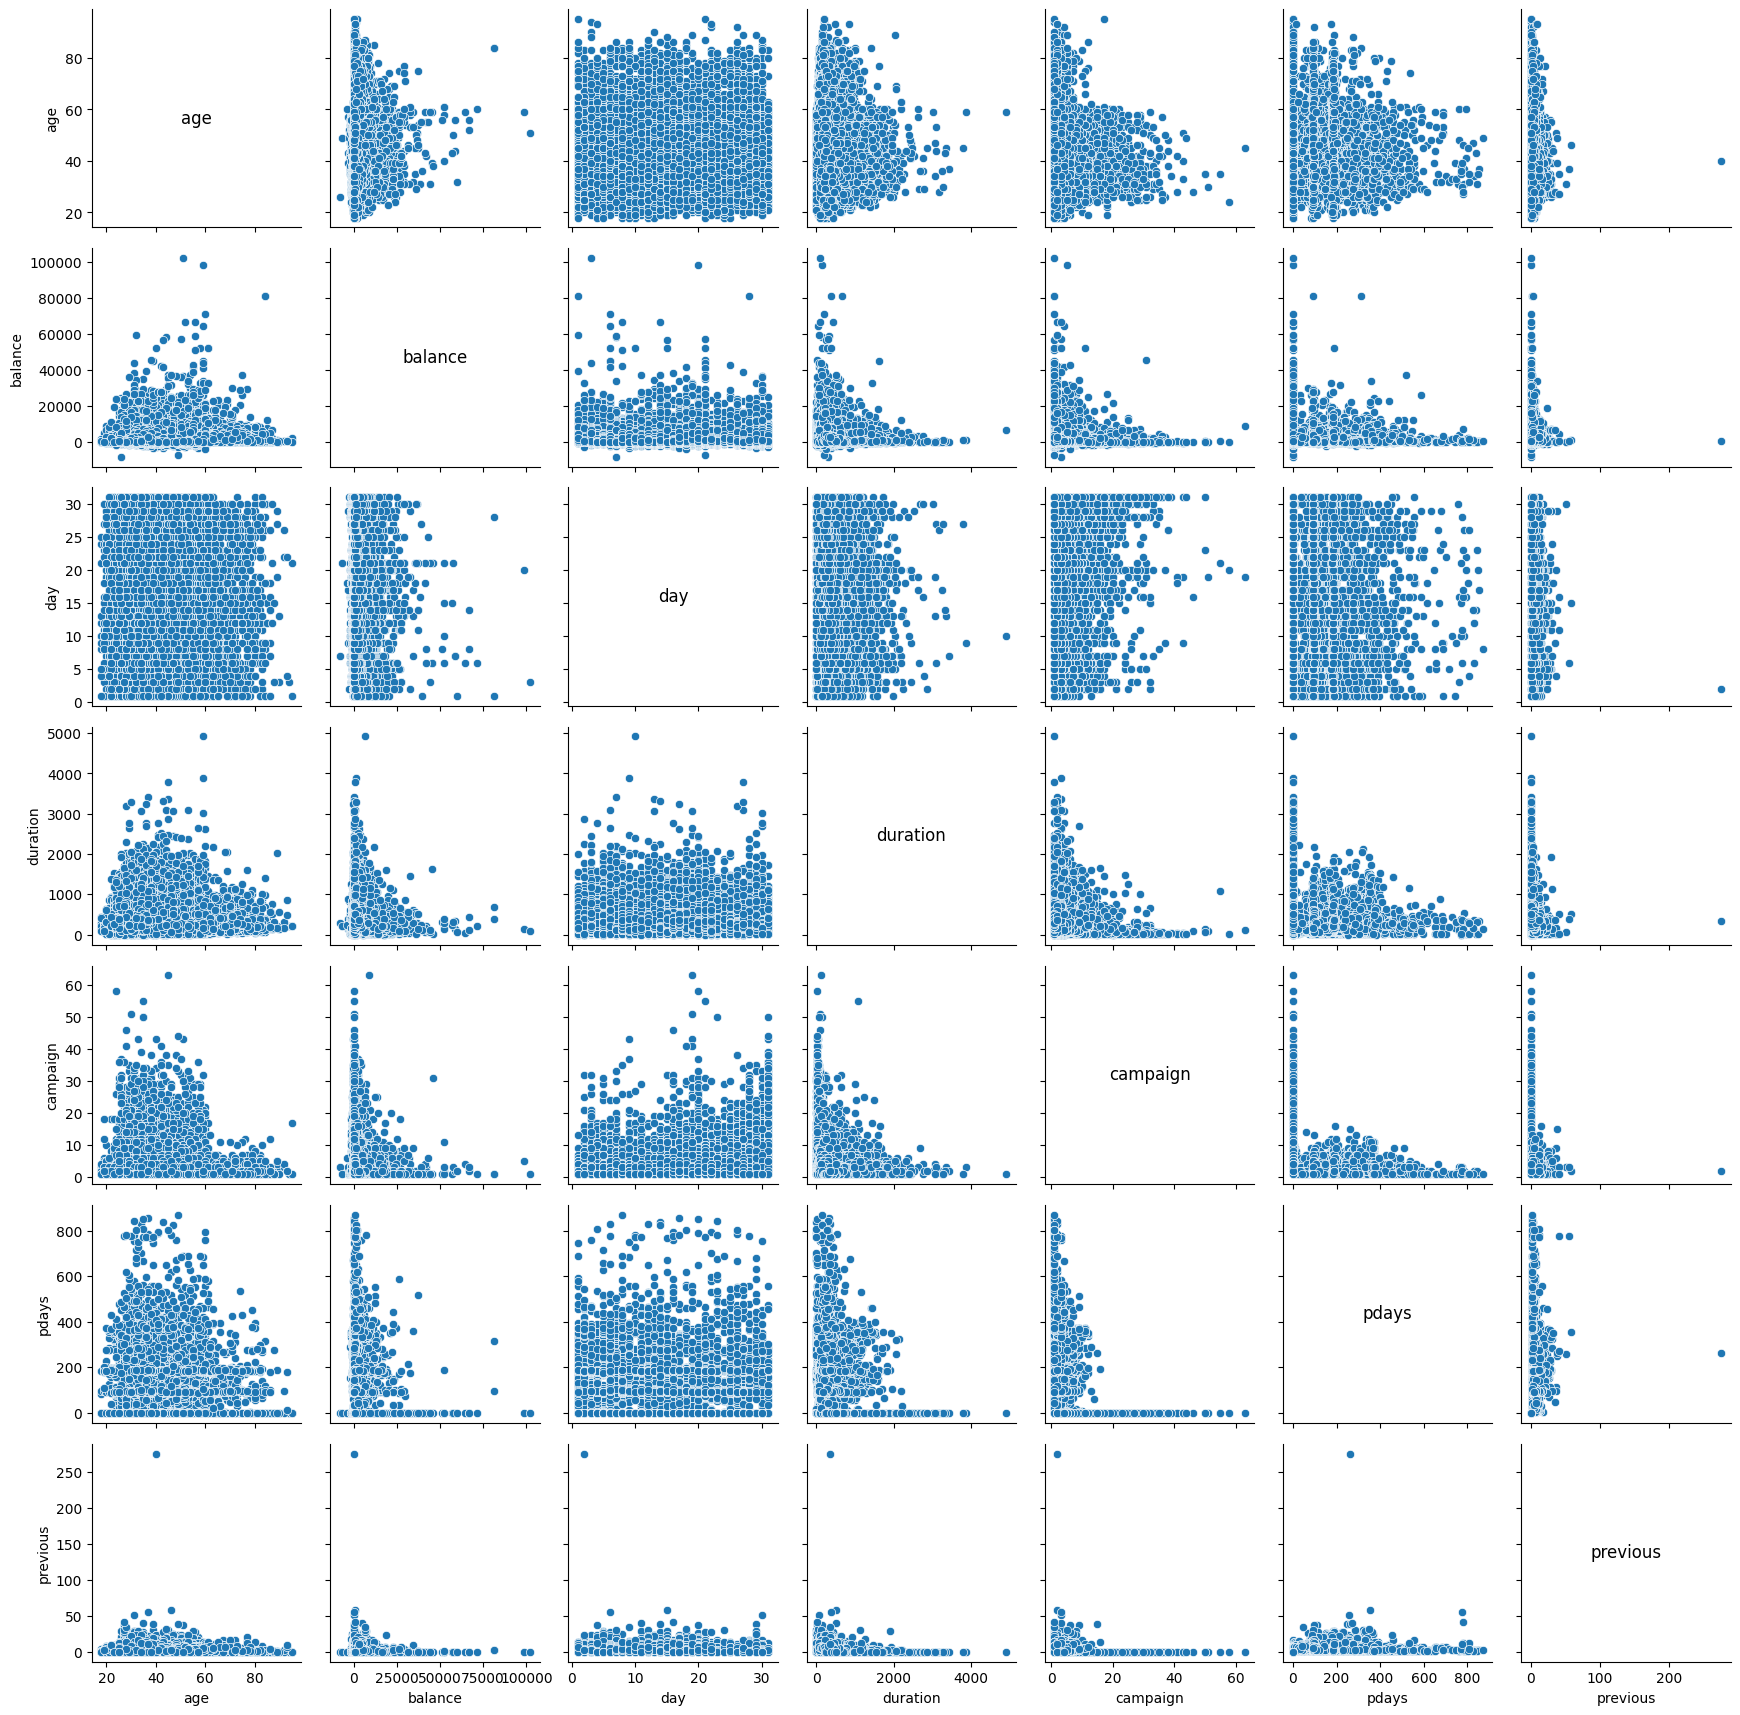

In [70]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

grid = sns.PairGrid(numerical_columns)

grid.map_lower(sns.scatterplot)
grid.map_upper(sns.scatterplot)

def label_diag(x, *args, **kwargs):
    plt.annotate(x.name, (0.5, 0.5), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12)

grid.map_diag(label_diag)

plt.show()

In [72]:
def create_boxplots(df, exclude_col='day_of_week', export_png=False, filename='boxplot.png'):
    if exclude_col in df.columns:
        numeric_cols = df.drop(columns=[exclude_col]).select_dtypes(include=[np.number])
    else:
        numeric_cols = df.select_dtypes(include=[np.number])

    num_cols = numeric_cols.shape[1]

    num_rows = (num_cols + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols.columns):
        # Izračunavanje IQR i broja outlier-a
        Q1 = numeric_cols[col].quantile(0.25)
        Q3 = numeric_cols[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = numeric_cols[col][(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)]

        axes[i].boxplot(numeric_cols[col].dropna(), vert=True, patch_artist=True)
        axes[i].set_title(col)
        axes[i].set_xlabel(f'Outliers: {len(outliers)}')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    if export_png:
        plt.savefig(filename)
        plt.close()
        return filename

    plt.show()

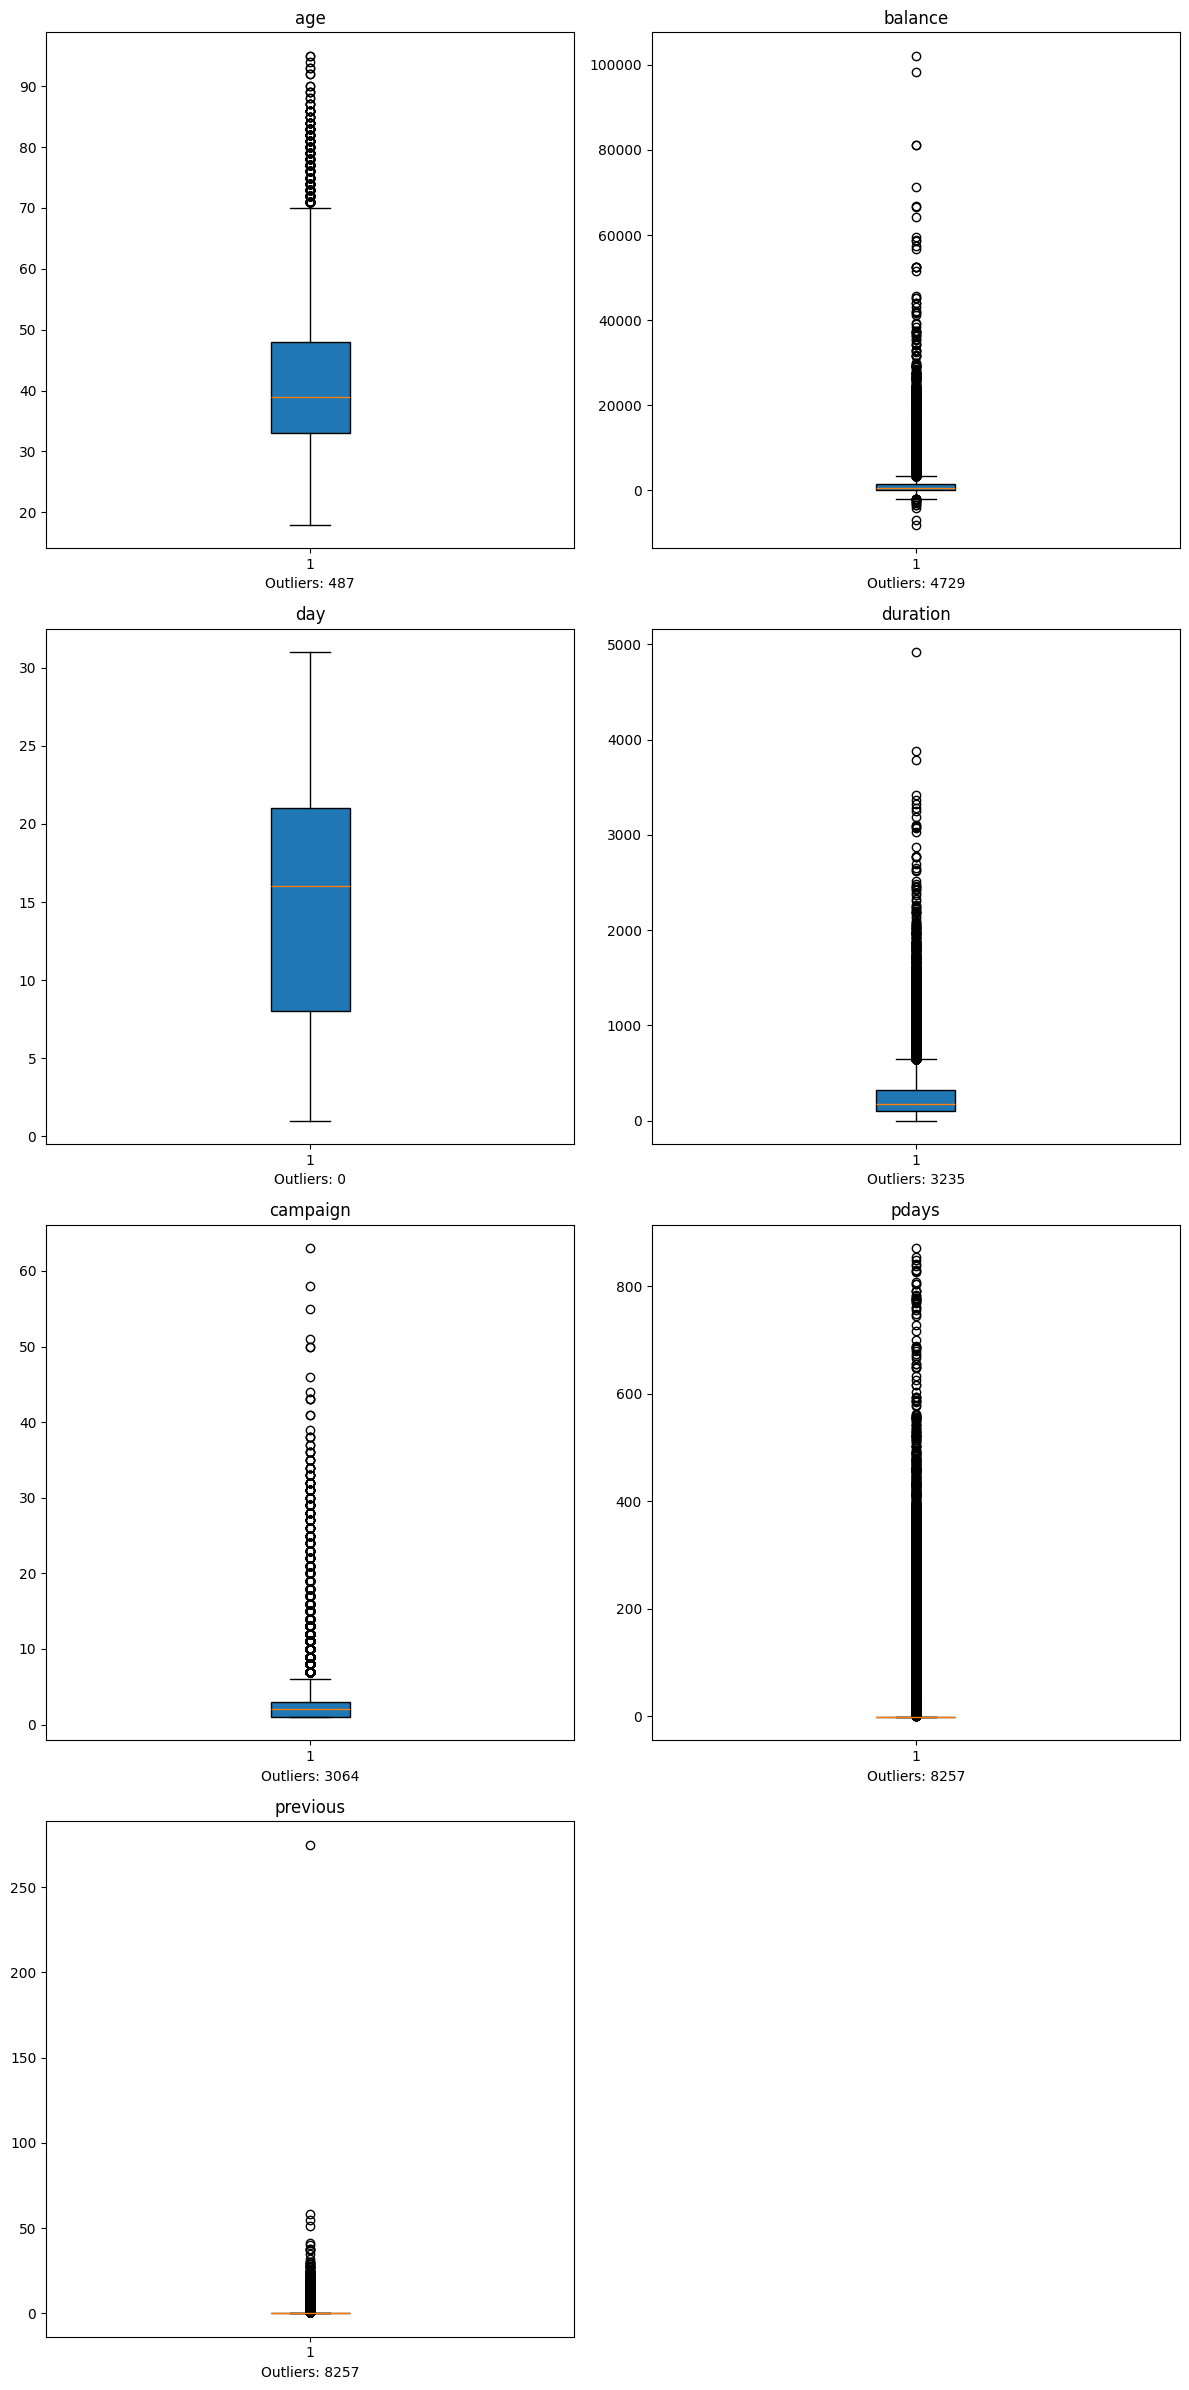

In [73]:
create_boxplots(df)